# The draining cup problem

In this notebook we will 

In [2]:
from IPython import display

In this notebook we will be modelling a draining cup. We assume the cup is shaped like a $conical frustrum$ or $truncated cone$:

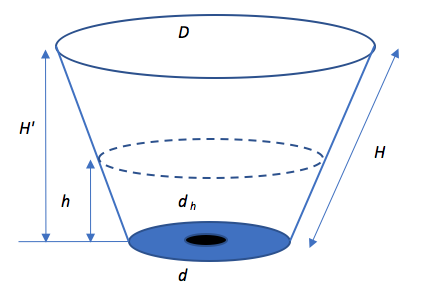

In [4]:
display.Image("./cup.png")

$D$ and $d$ are the top and bottom diameters of the cup, $H$ is the side length between the diameters, $dh$
is the hole diameter. We also define $H'$ as the vertical height of the cup and $h$ 
as the vertical height (or level) of the liquid in the cup

## 8.1 Volume-height relationship

Let's workout the relationship between the volume of water and the level in the cup by integrating the area: 

$$ V= \int_0^h A(x) dh$$

In [5]:
import sympy 
sympy.init_printing()

In [6]:
D, d, H, h = sympy.symbols('D, d, H, h', real = True)

In [7]:
R = D/2
r = d/2
Hprime = sympy.sqrt(H**2 - (R - r) **2) # Pythagoras

In [8]:
radius = r + h/Hprime*(R - r)

In [9]:
A = sympy.pi*radius**2

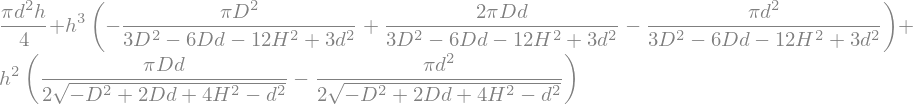

In [10]:
V = sympy.integrate(A, (h, 0, h))
V

In [11]:
print(V)

pi*d**2*h/4 + h**3*(-pi*D**2/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2) + 2*pi*D*d/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2) - pi*d**2/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2)) + h**2*(pi*D*d/(2*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2)) - pi*d**2/(2*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2)))


### 8.2 Dynamic Model

### Basic Model of the Cup
$$\begin{align}
\frac{dV}{dt} &= -F_{\text{out}} & \text{Mass Balance simplified to volume balance} \\
F_{\text{out}} &= f(h) & \text{Hydraulics} \\
h &= f(V) & \text{Geometry} \\
\end{align}
$$

The above geometric description allows us to find the $V(h)$, but we actually want $h(V)$

In [12]:
Vsymb = sympy.symbols('V', real=True)
hV =  sympy.solve(Vsymb - V, h)

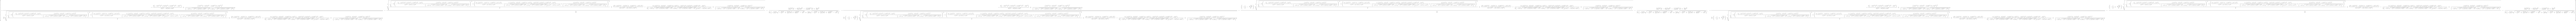

In [13]:
hV

In [15]:
print(hV)

[-(-3*(-3*D**2*d**2 + 6*D*d**3 + 12*H**2*d**2 - 3*d**4)/(4*D**2 - 8*D*d + 4*d**2) + (3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)**2/(-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))**2)/(3*(sqrt(-4*(-3*(-3*D**2*d**2 + 6*D*d**3 + 12*H**2*d**2 - 3*d**4)/(4*D**2 - 8*D*d + 4*d**2) + (3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)**2/(-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))**2)**3 + (27*(3*D**2*V - 6*D*V*d - 12*H**2*V + 3*V*d**2)/(pi*D**2 - 2*pi*D*d + pi*d**2) - 9*(3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)*(-3*D**2*d**2 + 6*D*d**3 + 12*H**2*d**2 - 3*d**4)/((-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))*(4*D**2 - 8*D*d + 4*d**2)) + 2*(3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)**3/(-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))**3)**2)/2 + 27*(3*D**2*V - 6*D*V*d - 12*H**2*V + 3*V*d**2)/(2*(pi*D**2 - 2*pi*D*d + pi*d**2)) - 9*(3*D**2*d - 6*D*d**2 - 12